#### Importation et lecture de données de training set
- Attribuer les colonnes **1 à 12** (caractéristiques) des données à `X`.
- Affecter la colonne **13** des données (étiquettes) à `Y`.

In [1]:
import pandas as pd
data = pd.read_csv('dataset/data_with_labels_train_std.csv')
X = data.iloc[:, 1:13]
Y = data.iloc[:, 13]

#### Réduction de la dimensionnalité avec l'algorithme ACP

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=11)
X_pca = pca.fit_transform(X)

#### Importation et lecture de données de predict set

In [3]:
data_pre = pd.read_csv('dataset/data_with_labels_predict_std.csv')
xx = data_pre.iloc[:, 1:13]
yy = data_pre.iloc[:, 13]
xx_pca = pca.transform(xx)

#### Optimisation des paramètres
Les hyperparamètres de la SVM (SVC) ont été optimisés à l'aide de l'optimisation bayésienne `BayesSearchCV` et entraînés sur un ensemble d'entraînement, puis la précision du modèle a été évaluée sur un ensemble de test.

In [6]:
import time
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

opt = BayesSearchCV(
    SVC(decision_function_shape='ovr', probability=True, max_iter=-1, random_state=42),
    {
        'C': (1, 1e+2, 'log-uniform'),
        'gamma': (1e-2, 1, 'log-uniform'),
        'kernel': ['rbf']
    },
    n_iter=15,
    cv=3,
    n_jobs=7
)

start_time = time.time()

opt.fit(X_train, Y_train)

end_time = time.time()
print(f"Time taken for parameter search: {end_time - start_time:.2f} seconds")

print("best params: %s" % str(opt.best_params_))

best_model = opt.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Test set accuracy: {accuracy}")

Time taken for parameter search: 66.54 seconds
best params: OrderedDict([('C', 49.3348292704967), ('gamma', 0.012616347874517259), ('kernel', 'rbf')])
Test set accuracy: 1.00


#### Entraîner le modèle SVM et prédire

In [7]:
from sklearn.metrics import accuracy_score
pred = best_model.predict(xx)
score = accuracy_score(yy, pred)
print(f"Accuracy: {score}")

Accuracy: 0.9989963396243889


#### Calculer les matrices de confusion

In [8]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy, pred)
print(conf_matrix)

[[1769243    1251]
 [    548   21397]]


#### Matrice de confusion visuelle

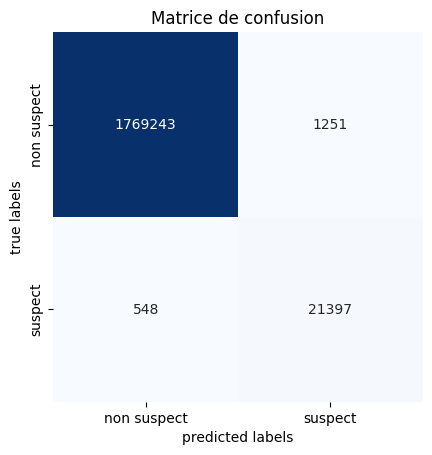

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure("Confusion matrix")
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, xticklabels=["non suspect", "suspect"], yticklabels=["non suspect", "suspect"], cmap="Blues", fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.title("Matrice de confusion")
plt.show()